# Проект: Прогнозирование оттока клиентов телекоммуникационной компании

ФИО: Исоев И.Н

### **Описание проекта:**  
Проект направлен на прогнозирование оттока клиентов телекоммуникационной компании с использованием алгоритмов машинного обучения. Основная цель — предсказать, уйдет ли клиент, на основе его поведения и характеристик предоставляемых услуг. Для этого используются различные модели классификации, а также проводится подбор гиперпараметров с помощью **RandomizedSearchCV**. Итоговые метрики позволяют выбрать наиболее эффективную модель.


#### Основные этапы проекта:

1. **Загрузка данных:**
   - Загрузка набора данных о клиентах телекоммуникационной компании для анализа.

2. **Предварительная обработка данных:**
   - Очистка данных от пропусков и выбросов.
   - Преобразование данных в формат, удобный для дальнейшего анализа.

3. **Кодирование категориальных признаков и масштабирование числовых данных:**
   - Применение методов кодирования для категориальных признаков (например, One-Hot Encoding, Label Encoding).
   - Масштабирование числовых признаков с использованием StandardScaler или MinMaxScaler для нормализации данных.

4. **Обучение и тестирование моделей:**
   - Обучение и тестирование различных классификационных моделей:
     - **KNeighborsClassifier**
     - **LogisticRegression**
     - **DecisionTreeClassifier**
     - **RandomForestClassifier**
     - Дополнительно можно рассмотреть другие модели (например, **XGBoost** или **CatBoost**).

5. **Визуализация результатов:**
   - Построение **ROC-кривых** для всех моделей, чтобы оценить их способность различать классы.
   - Оценка **важности признаков** с помощью RandomForest, чтобы понять, какие факторы влияют на отток клиентов.
   - Построение **матрицы корреляции** для анализа связей между признаками и выявления возможных мультиколлинеарных зависимостей.

6. **Гиперпараметры для RandomizedSearchCV:**
   - Применение **RandomizedSearchCV** для оптимизации гиперпараметров моделей, чтобы найти наилучшие настройки для каждой из них.
   - Это улучшит точность 
#### Итоговый вывод:
Проектект показывает, что использование различных моделей машинного обучения позволяет достичь хороших результатов в предсказании оттока клиентов. **CatBoost** оказался лучшим выбором для данной задачи, однако стоит обратить внимание и на другие модели, такие как **Logistic Regression** и **Random Forest**, которые тоже могут быть полезны в различных ситуациях. Работая с данной моделью, можно не только предсказать, кто вероятно уйдёт, но и понять важные факторы, влияющие на этот процесс, что позволит предпринять меры для удержания клиентов.
и улучшения стратегии удержания.

Этот анализ поможет бизнесу телекоммуникационной компании выявить ключевые факторы, влияющие на отток клиентов, и разработать стратегии для удержания клиентов, основанные на данных.

#### Итоговый вывод:

Файл **telecom_users.csv** содержит следующие значения:

     customerID – id клиента
     gender – пол клиента (male/female)
     SeniorCitizen – яляется ли клиент пенсионером (1, 0)
     Partner – состоит ли клиент в браке (Yes, No)
     Dependents – есть ли у клиента иждивенцы (Yes, No)
     tenure – сколько месяцев человек являлся клиентом компании
     PhoneService – подключена ли услуга телефонной связи (Yes, No)
     MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
     InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
     OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
     OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
     DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
     TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
     StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
     StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
     Contract – тип контракта клиента (Month-to-month, One year, Two year)
     PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
     PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
     MonthlyCharges – месячный размер оплаты на настоящий момент
     TotalCharges – общая сумма, которую клиент заплатил за услуги за все время
     Churn – произошел ли отток (Yes or No)

#### 1. Загрузка данных

In [168]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from tabulate import tabulate  


In [170]:
# Загрузка dataset
data = pd.read_csv('telecom_users.csv')

data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


#### 2. Предварительная обработка данных

In [172]:
# Разведочный анализ данных (EDA)
print("Размер датасета:", data.shape)
print("\nТипы данных:")
print(data.dtypes)
print("\nКоличество пропущенных значений:")
print(data.isnull().sum())
print("\nКоличество пробелов:")
print((data == ' ').sum()) 

Размер датасета: (5986, 22)

Типы данных:
Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Количество пропущенных значений:
Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupp

In [174]:
# Обработка TotalCharges (замена пробелов, преобразование в float, заполнение медианой)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
(data == ' ').sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [176]:
# Удаление ненужных столбцов
data.drop(columns=['Unnamed: 0', 'customerID'], inplace=True)

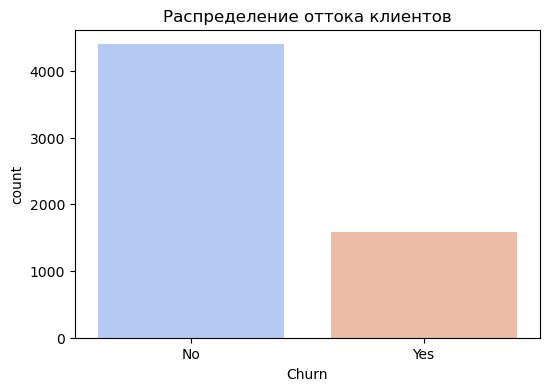

In [178]:
# Распределение целевого признака
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, hue='Churn', palette='coolwarm', legend=False)
plt.title('Распределение оттока клиентов')
plt.show()

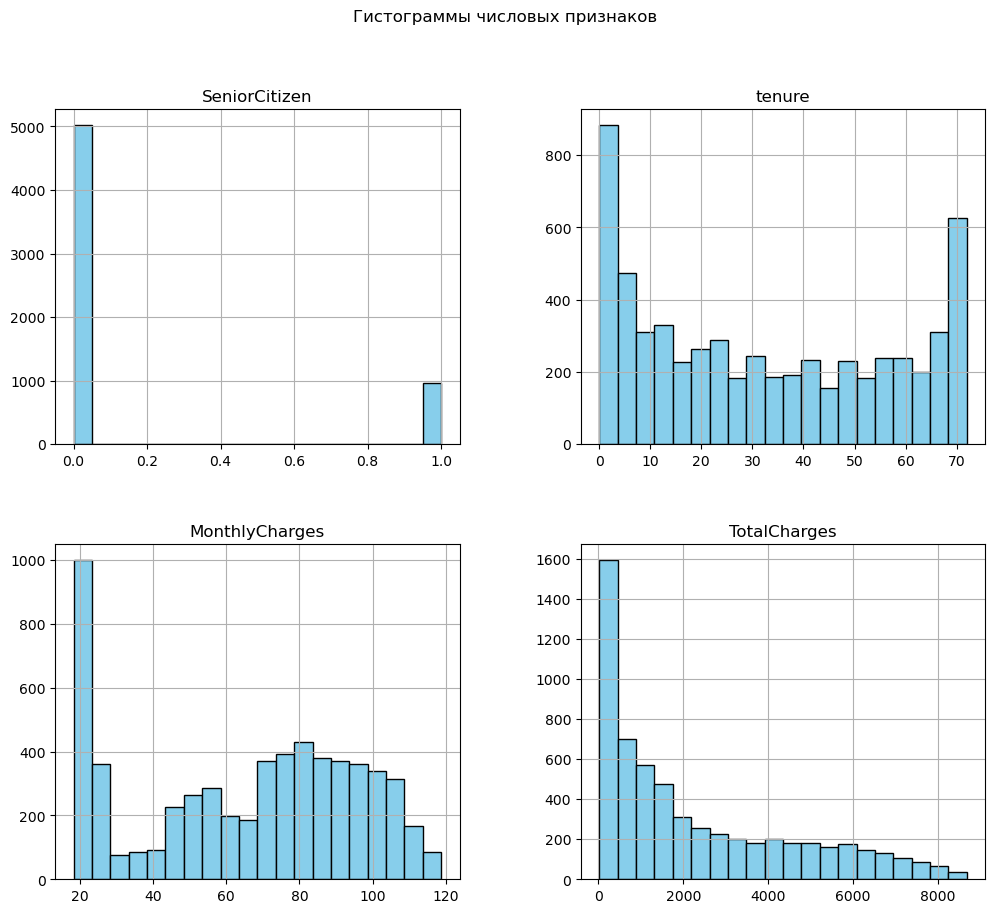

In [180]:
# Распределение числовых признаков
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы числовых признаков')
plt.show()

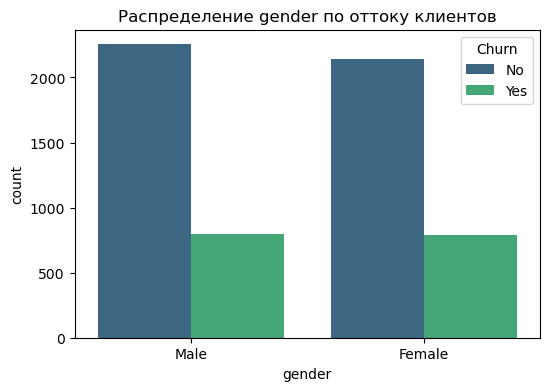

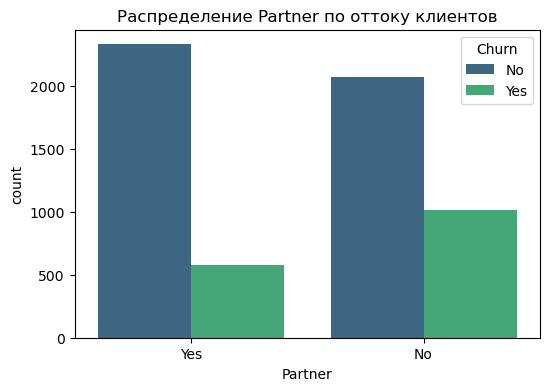

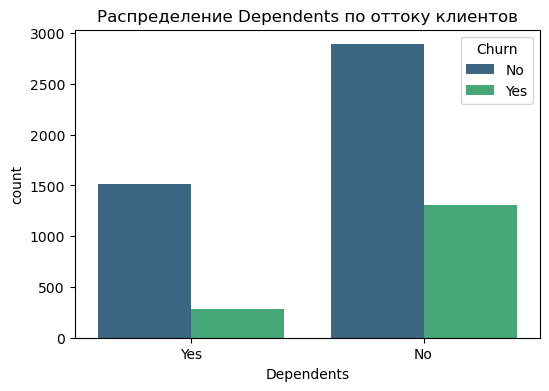

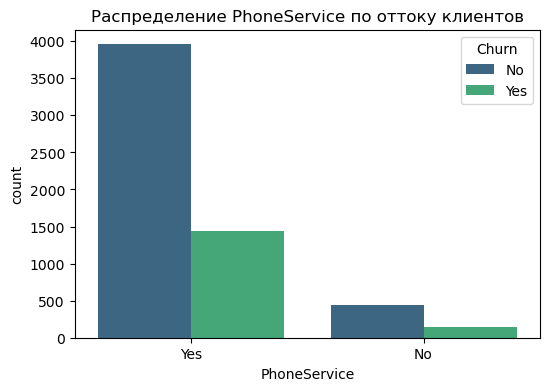

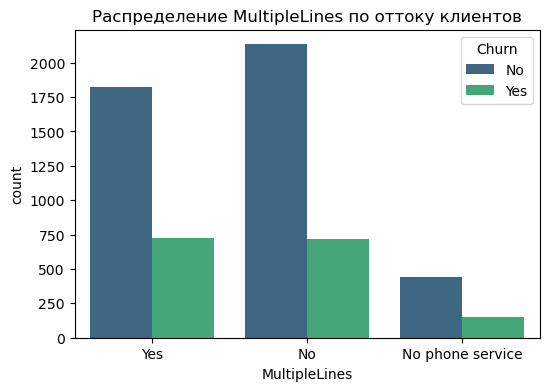

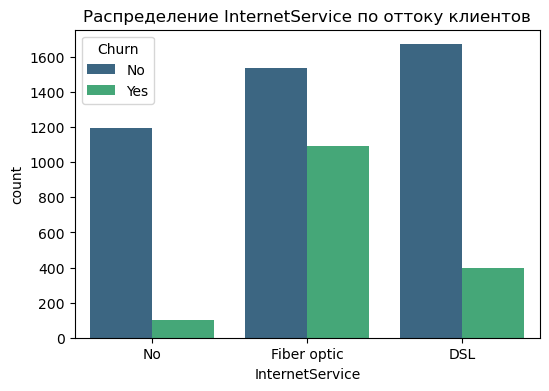

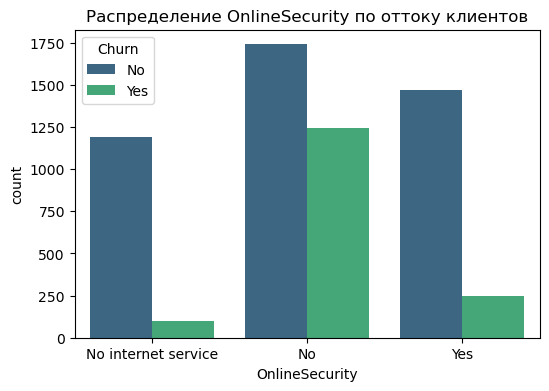

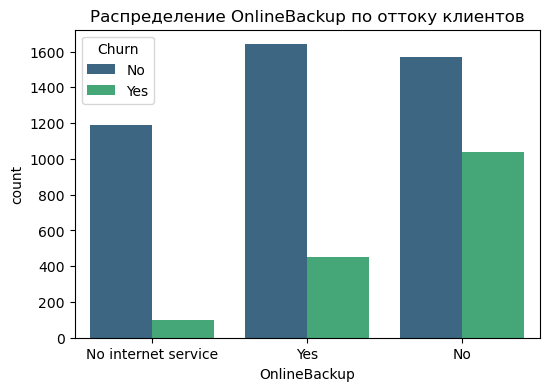

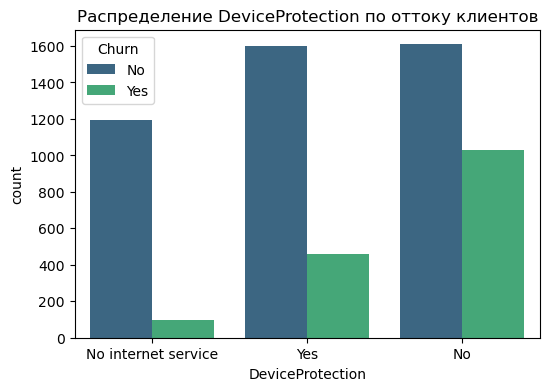

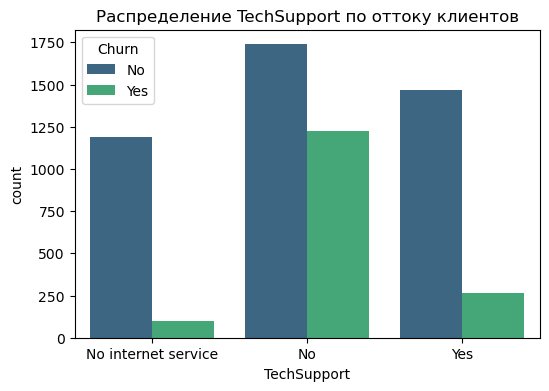

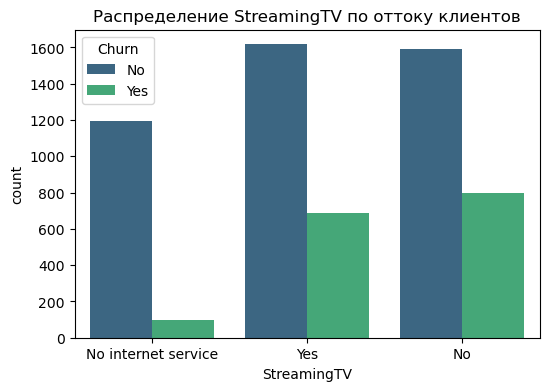

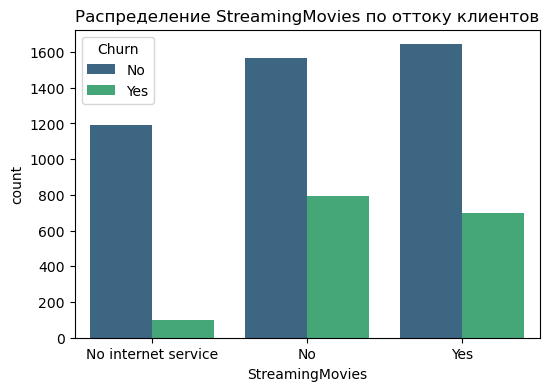

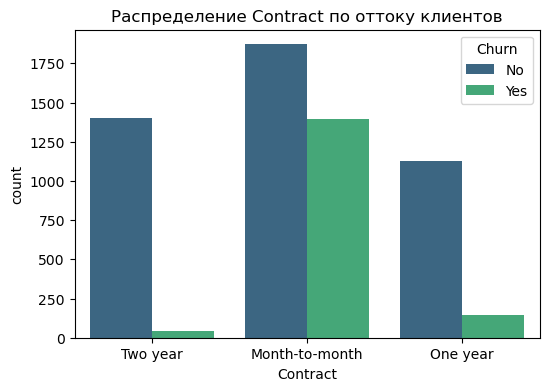

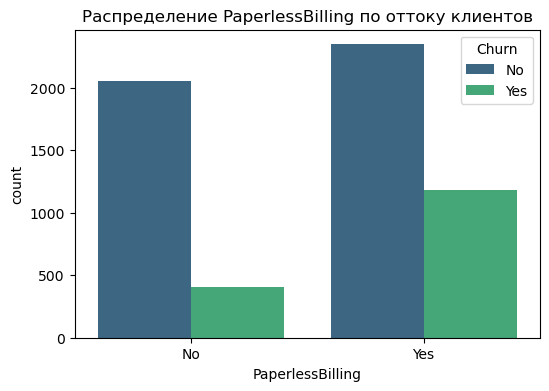

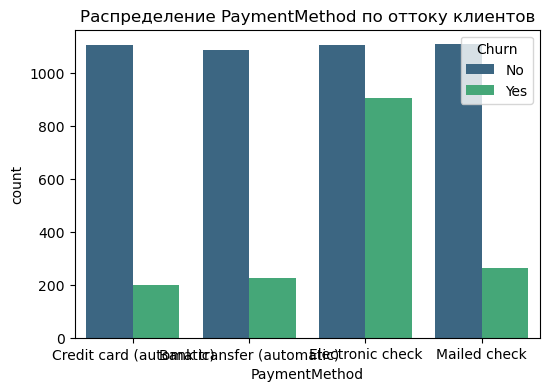

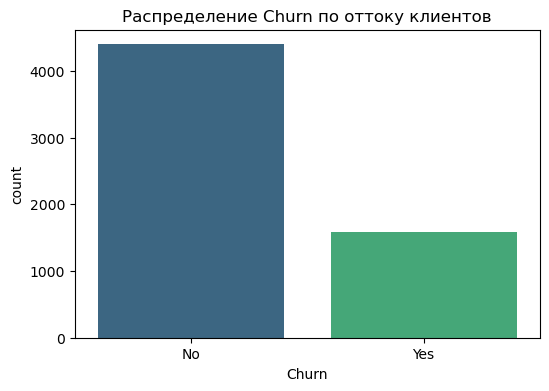

In [18]:
# Анализ категориальных признаков
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], hue=data['Churn'], palette='viridis') 
    plt.title(f'Распределение {col} по оттоку клиентов')
    plt.show()

#### 3. Кодирование категориальных признаков и масштабирование числовых данных

In [182]:
# Разделяем признаки для Label Encoding и Target Encoding
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
ohe_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
target_cols = ['InternetService']

# Label Encoding для бинарных признаков
le = LabelEncoder()
for col in label_cols:
    data[col] = le.fit_transform(data[col])

# One-Hot Encoding для категориальных признаков с несколькими категориями
data = pd.get_dummies(data, columns=ohe_cols, drop_first=True)

# Target Encoding для признаков, которые могут влиять на отток
te = TargetEncoder(cols=target_cols)
data[target_cols] = te.fit_transform(data[target_cols], data['Churn'])


In [184]:
# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['Churn'])) 
X = pd.DataFrame(X_scaled, columns=data.drop(columns=['Churn']).columns) 
y = data['Churn']


#### 4. Обучение и тестирование моделей

In [186]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Список моделей
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(verbose=-1, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

In [190]:
# Кросс-валидация для оценки моделей
results = []

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    results.append({'Model': name, 'Mean ROC AUC': scores.mean()})

results_df = pd.DataFrame(results)
print("Результаты кросс-валидации:")
print(results_df)

# Обучение всех моделей после оценки
trained_models = {}

for name, model in models.items():
    print(f"Обучение модели: {name}")
    model.fit(X_train, y_train)
    trained_models[name] = model

print("Все модели обучены!")


Результаты кросс-валидации:
                 Model  Mean ROC AUC
0                  KNN      0.775408
1  Logistic Regression      0.844445
2        Decision Tree      0.644044
3        Random Forest      0.826929
4    Gradient Boosting      0.845374
5              XGBoost      0.820741
6             LightGBM      0.831191
7             CatBoost      0.841305
Обучение модели: KNN
Обучение модели: Logistic Regression
Обучение модели: Decision Tree
Обучение модели: Random Forest
Обучение модели: Gradient Boosting
Обучение модели: XGBoost
Обучение модели: LightGBM
Обучение модели: CatBoost
Все модели обучены!


#### 5. Визуализация результатов

+---+---------------------+----------+-----------+--------+----------+---------+
|   |        Model        | Accuracy | Precision | Recall | F1-Score | ROC AUC |
+---+---------------------+----------+-----------+--------+----------+---------+
| 0 |         KNN         |  0.7513  |  0.5075   | 0.5611 |  0.7552  | 0.7512  |
| 1 | Logistic Regression |  0.803   |  0.6293   | 0.538  |  0.7977  | 0.8305  |
| 2 |    Decision Tree    |  0.7237  |   0.46    | 0.5314 |  0.7299  | 0.6601  |
| 3 |    Random Forest    |  0.7813  |  0.5872   | 0.4554 |  0.7715  | 0.8065  |
| 4 |  Gradient Boosting  |  0.7955  |   0.616   | 0.5083 |  0.7886  | 0.8271  |
| 5 |       XGBoost       |  0.7738  |  0.5588   | 0.5017 |  0.7696  | 0.8109  |
| 6 |      LightGBM       |  0.7922  |  0.6031   | 0.5215 |  0.7869  | 0.8217  |
| 7 |      CatBoost       |  0.7988  |  0.6211   | 0.5248 |  0.7929  | 0.8275  |
+---+---------------------+----------+-----------+--------+----------+---------+


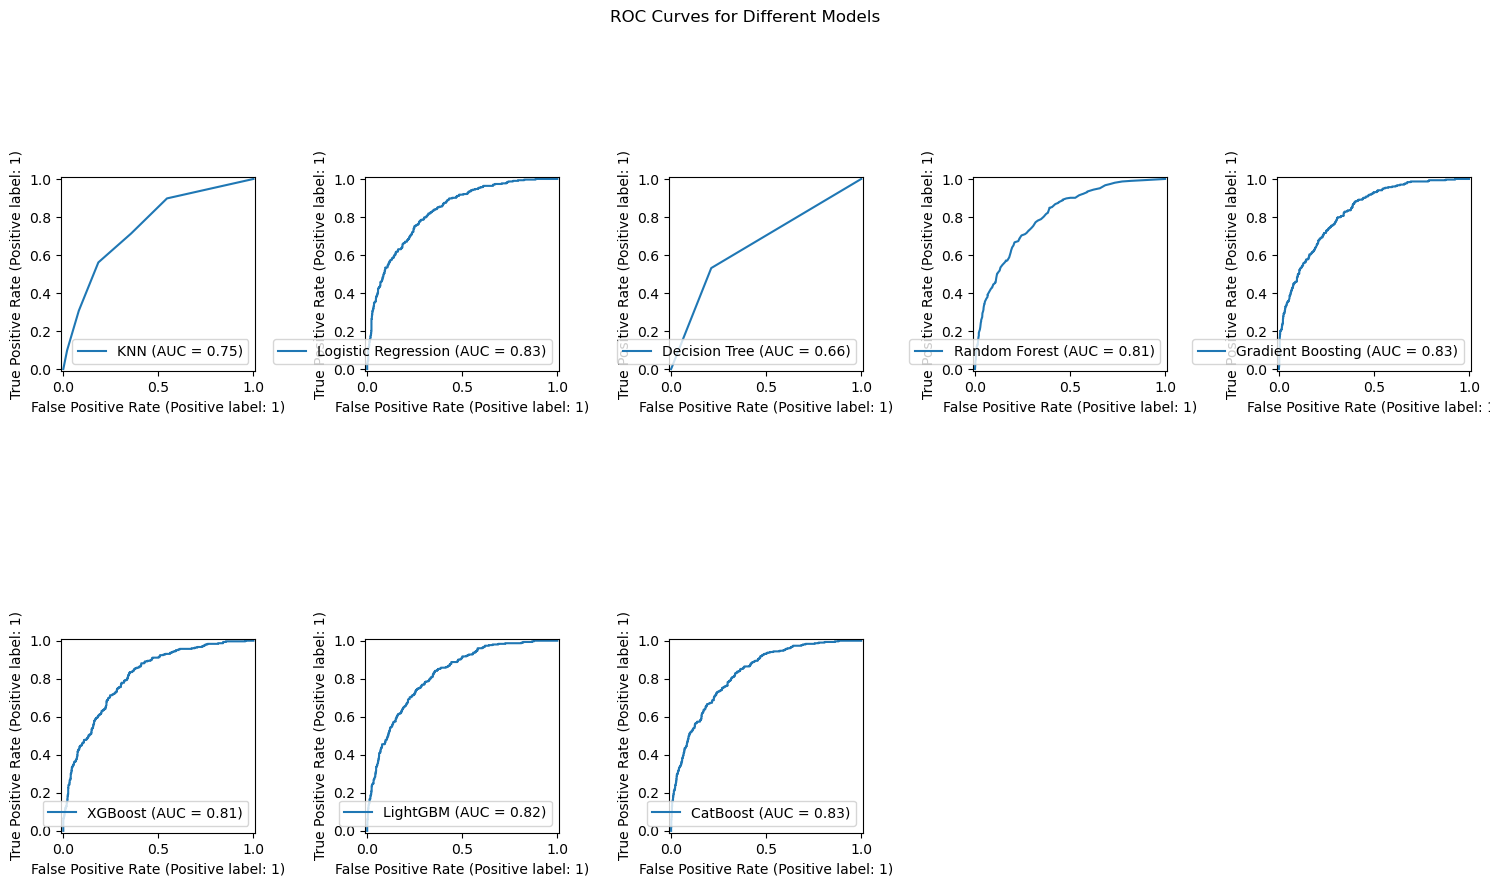

In [192]:
# Визуализация ROC кривых для моделей
results = []

plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report["weighted avg"]["f1-score"] 

    results.append([name, accuracy, precision, recall, f1_score, roc_auc])

    if y_prob is not None:
        plt.subplot(2, 5, i)
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=plt.gca(), name=name)

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"])
df_results = df_results.round(4)

print(tabulate(df_results, headers="keys", tablefmt="pretty", floatfmt=".4f"))

plt.suptitle('ROC Curves for Different Models')
plt.tight_layout()
plt.show()


In [194]:
# Сортировка моделей по ROC AUC
best_models = df_results.sort_values(by="ROC AUC", ascending=False)
print("Лучшие модели по ROC AUC:")
print(tabulate(best_models.head(1), headers="keys", tablefmt="pretty", floatfmt=".4f"))

# Сортировка моделей по точности
best_accuracy_model = df_results.sort_values(by="Accuracy", ascending=False)
print("Модель с наивысшей точностью:")
print(tabulate(best_accuracy_model.head(1), headers="keys", tablefmt="pretty", floatfmt=".4f"))

Лучшие модели по ROC AUC:
+---+---------------------+----------+-----------+--------+----------+---------+
|   |        Model        | Accuracy | Precision | Recall | F1-Score | ROC AUC |
+---+---------------------+----------+-----------+--------+----------+---------+
| 1 | Logistic Regression |  0.803   |  0.6293   | 0.538  |  0.7977  | 0.8305  |
+---+---------------------+----------+-----------+--------+----------+---------+
Модель с наивысшей точностью:
+---+---------------------+----------+-----------+--------+----------+---------+
|   |        Model        | Accuracy | Precision | Recall | F1-Score | ROC AUC |
+---+---------------------+----------+-----------+--------+----------+---------+
| 1 | Logistic Regression |  0.803   |  0.6293   | 0.538  |  0.7977  | 0.8305  |
+---+---------------------+----------+-----------+--------+----------+---------+


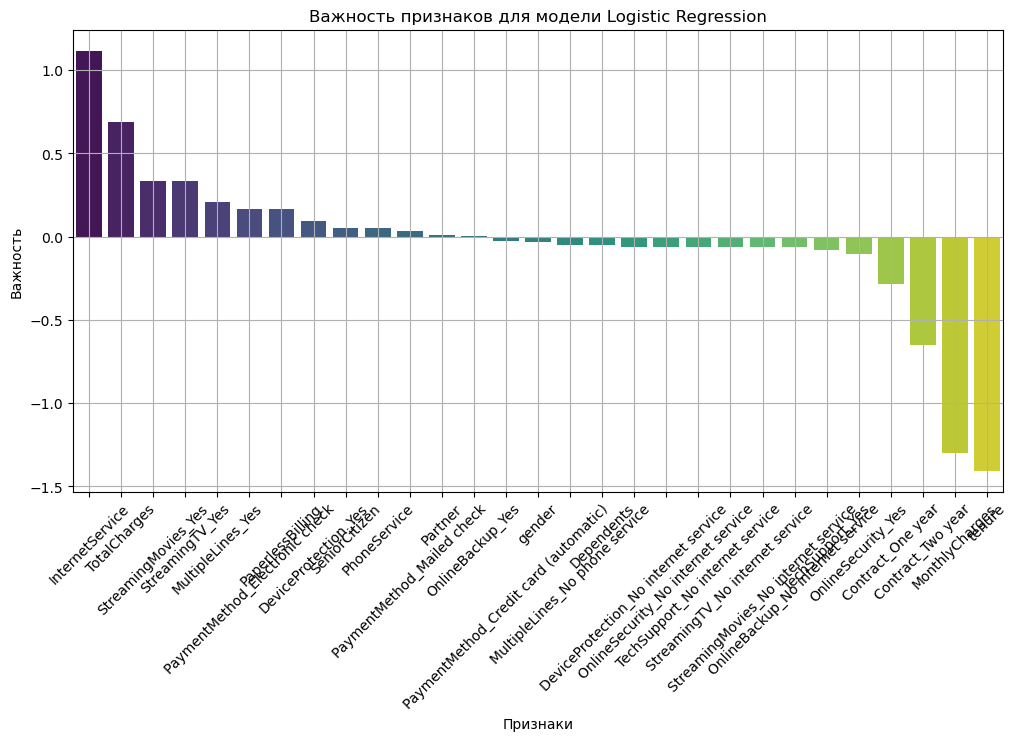

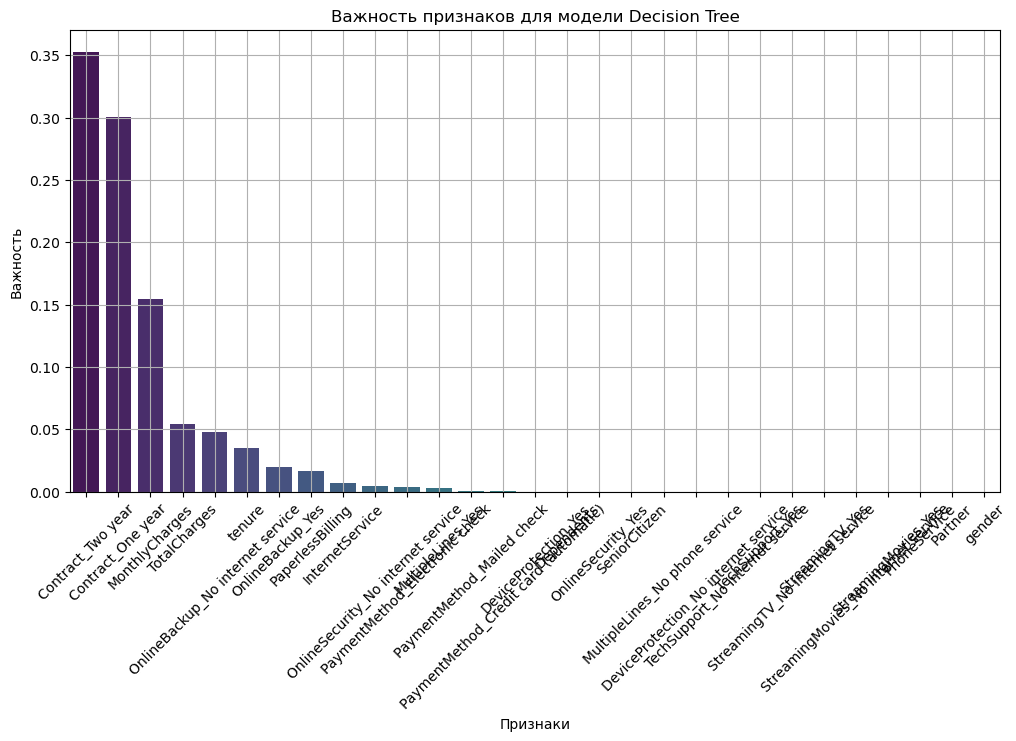

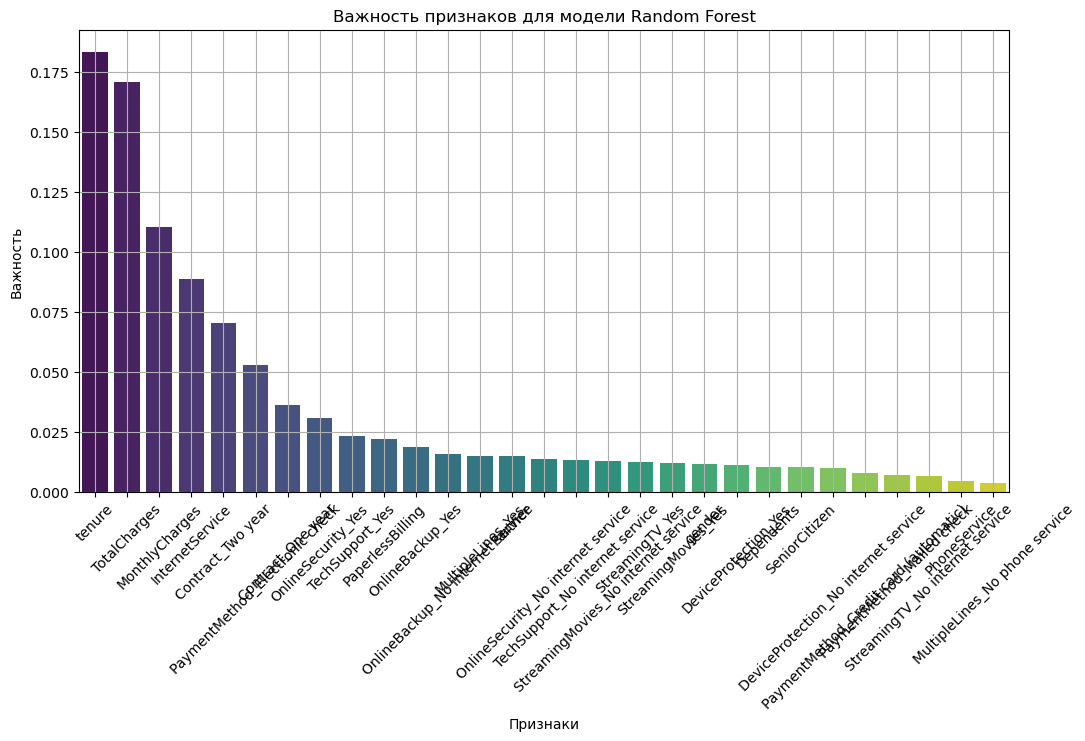

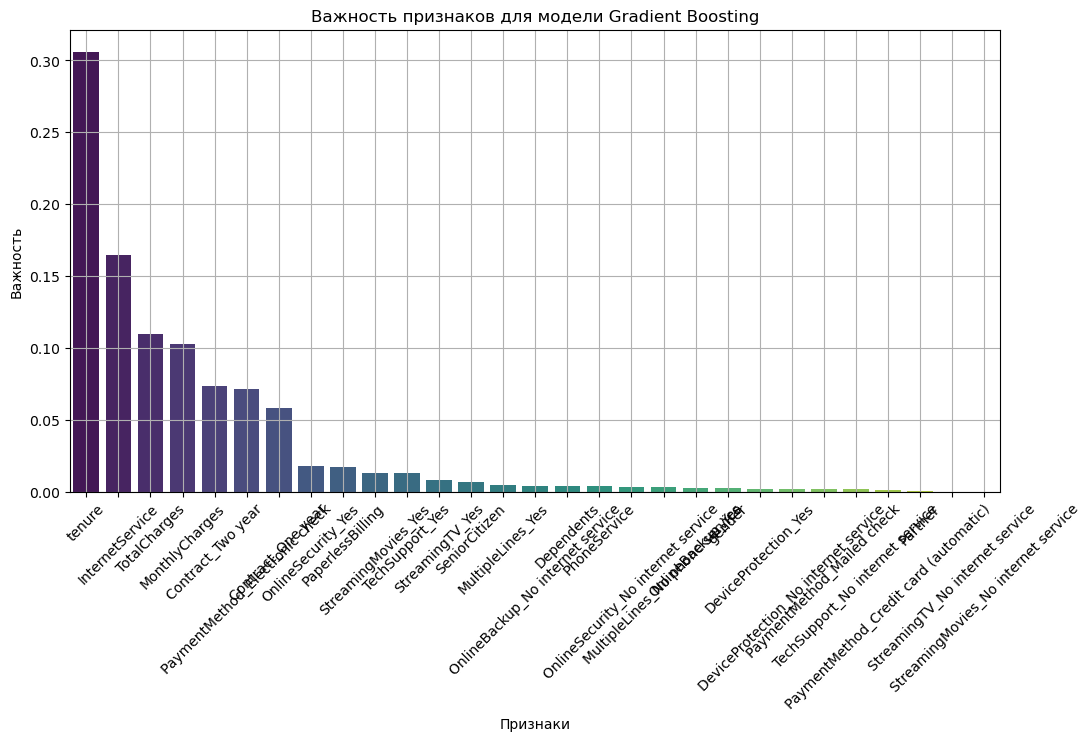

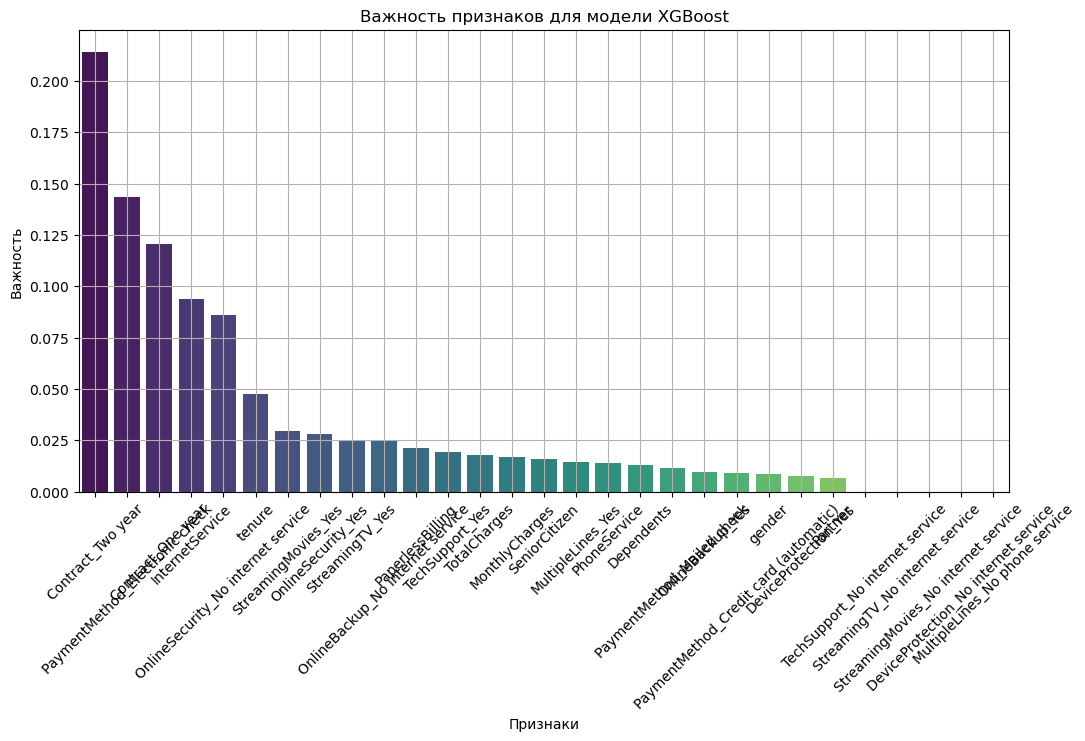

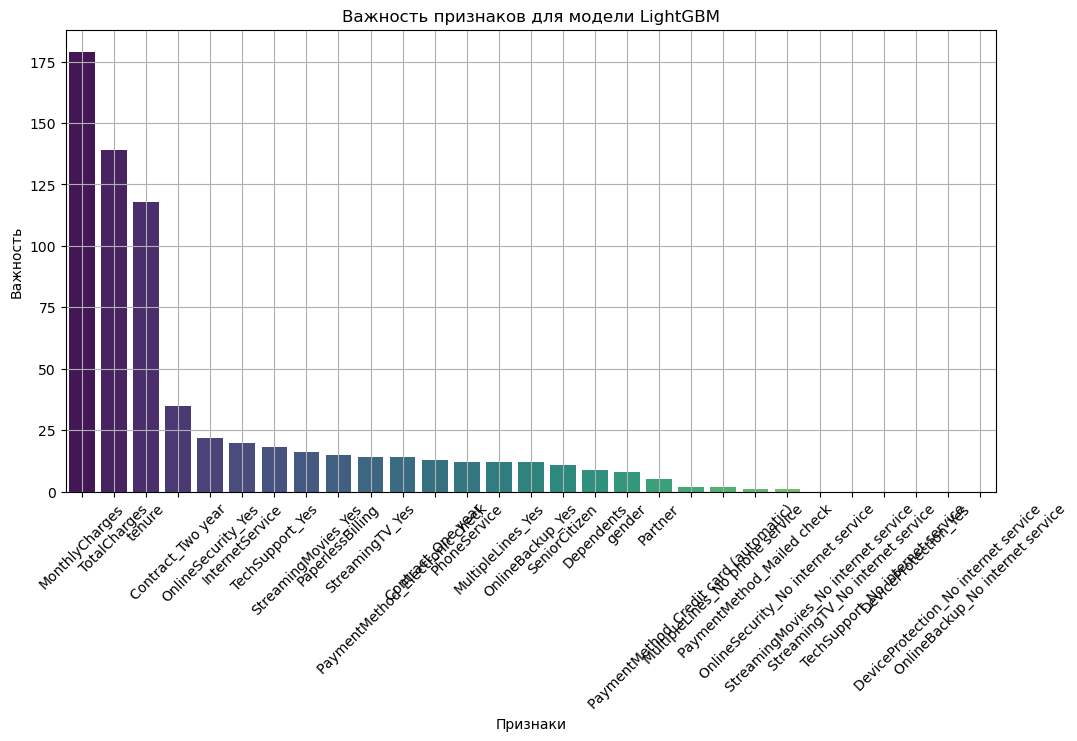

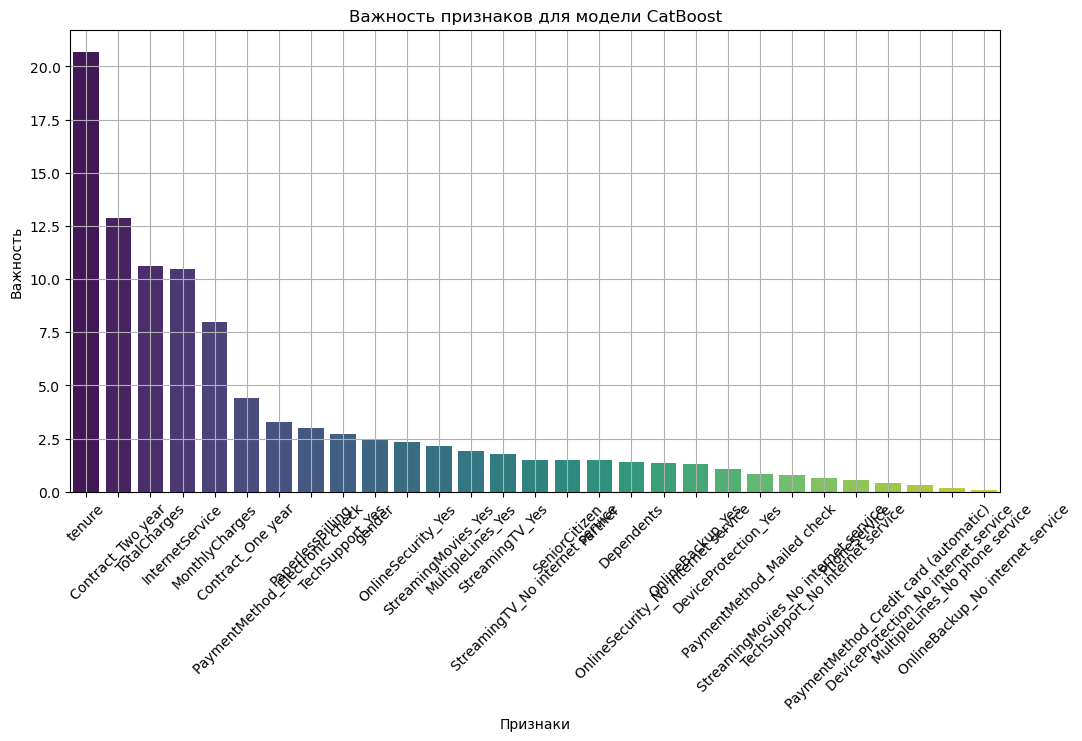

In [110]:
# Визуализация важности признаков
for name, model in trained_models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_.flatten()
    else:
        continue
    
    feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importances.index, y=feature_importances.values, hue=feature_importances.index, palette='viridis', legend=False)
    plt.title(f'Важность признаков для модели {name}')
    plt.xticks(rotation=45)
    plt.xlabel('Признаки')
    plt.ylabel('Важность')
    plt.grid(True)
    plt.show()

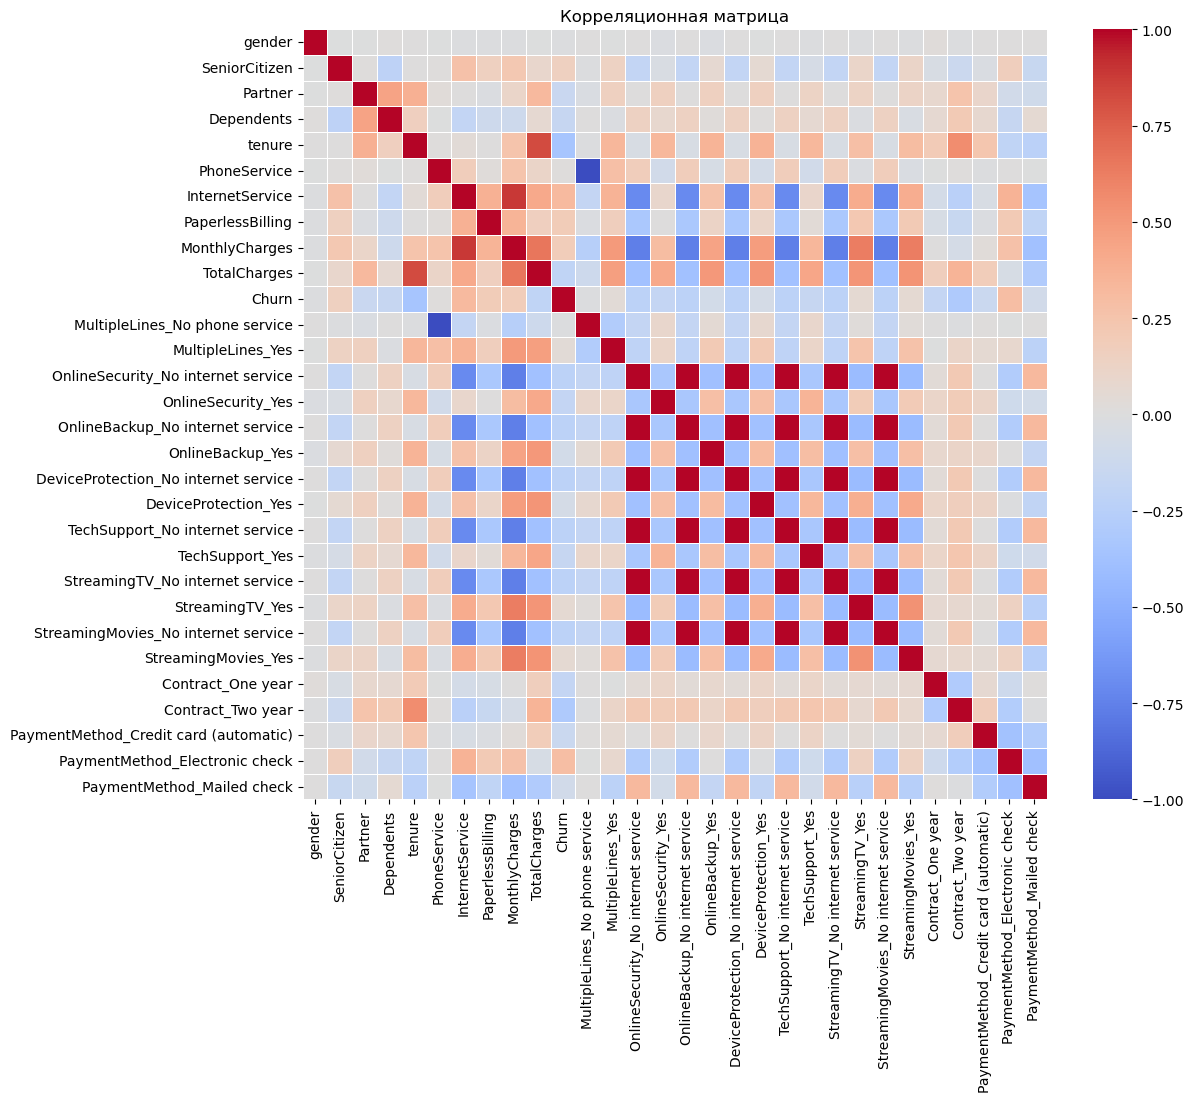

In [196]:
# Корреляционная матрица
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

#### 6. Гиперпараметры для RandomizedSearchCV

In [198]:
# Гиперпараметры для каждой модели
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'l2_leaf_reg': [3, 5, 10]
    }
}

In [202]:
# Функция для применения RandomizedSearchCV
def train_with_random_search(model, param_grid, X_train, y_train):
    # Ограничиваем количество итераций
    n_iter = min(10, len(ParameterGrid(param_grid)))  # Ограничиваем до 10 или меньше, если сетка меньше
    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, n_iter=n_iter, random_state=42)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_, random_search.best_params_

results = []
trained_models = {}

for name, model in models.items():
    print(f"Обучение модели: {name}")
    best_model, best_params = train_with_random_search(model, param_grids[name], X_train, y_train)
    trained_models[name] = best_model
    
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Best Params': best_params,
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })


Обучение модели: KNN
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучение модели: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Обучение модели: Decision Tree
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучение модели: Random Forest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучение модели: Gradient Boosting
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучение модели: XGBoost
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучение модели: LightGBM
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Обучение модели: CatBoost
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [204]:
for result in results:
    print(f"Модель: {result['Model']}")
    print(f"Лучшие параметры: {result['Best Params']}")
    print(f"ROC AUC после оптимизации: {result['ROC AUC']:.4f}")
    print("-" * 50)


Модель: KNN
Лучшие параметры: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}
ROC AUC после оптимизации: 0.7833
--------------------------------------------------
Модель: Logistic Regression
Лучшие параметры: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
ROC AUC после оптимизации: 0.8306
--------------------------------------------------
Модель: Decision Tree
Лучшие параметры: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
ROC AUC после оптимизации: 0.7944
--------------------------------------------------
Модель: Random Forest
Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
ROC AUC после оптимизации: 0.8281
--------------------------------------------------
Модель: Gradient Boosting
Лучшие параметры: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
ROC AUC после оптимизации: 0.8316
-----------------------------------

#### Итоговый вывод

In [232]:
#Сводные результаты по моделям

df_results = pd.DataFrame(results).drop(columns=['Best Params']).round(4)

print("\nСводные результаты по моделям:")
print(tabulate(df_results, headers='keys', tablefmt='pretty'))


Сводные результаты по моделям:
+---+---------------------+---------+----------+-----------+--------+
|   |        Model        | ROC AUC | Accuracy | Precision | Recall |
+---+---------------------+---------+----------+-----------+--------+
| 0 |         KNN         | 0.7833  |  0.7579  |  0.5198   | 0.5644 |
| 1 | Logistic Regression | 0.8306  |  0.8047  |  0.6342   | 0.538  |
| 2 |    Decision Tree    | 0.7944  |  0.7588  |  0.5241   | 0.5017 |
| 3 |    Random Forest    | 0.8281  |  0.803   |  0.6367   | 0.5149 |
| 4 |  Gradient Boosting  | 0.8316  |  0.793   |  0.6062   | 0.5182 |
| 5 |       XGBoost       | 0.8341  |  0.8072  |  0.6463   | 0.5248 |
| 6 |      LightGBM       | 0.8309  |  0.8005  |   0.625   | 0.5281 |
| 7 |      CatBoost       | 0.8361  |  0.8088  |  0.6492   | 0.5314 |
+---+---------------------+---------+----------+-----------+--------+


На основе результатов можно сделать несколько ключевых выводов:

1. **Лучшие модели:**
   - **CatBoost** продемонстрировал наилучший результат по ROC AUC (0.8361), что указывает на его высокую способность различать положительные и отрицательные классы (отток клиентов). Это хороший выбор для данной задачи.
   - **Logistic Regression** показала хорошую точность (0.8047), что также указывает на её стабильность в предсказаниях, особенно в случае бинарных задач.
   - **Random Forest** и **XGBoost** также показали хорошие результаты, что подтверждает их эффективность в сложных задачах с множеством признаков.

2. **Метрики:**
   - **ROC AUC** является важным показателем для оценки качества модели в задачах с несбалансированными классами (что часто бывает в задачах предсказания оттока клиентов). Модели, такие как CatBoost и Logistic Regression, показали высокие значения этого показателя, что делает их предпочтительными.
   - **Точность (Accuracy)** варьируется от 0.75 до 0.80 для большинства моделей. Это означает, что модели эффективно предсказывают отток, но есть место для улучшений, особенно при работе с несбалансированными классами.
   - **Precision** и **Recall** показывают, что большинство моделей хорошо справляются с предсказанием клиентов, которые не уйдут (точность), но нуждаются в улучшении по части точности предсказаний ухода клиентов (Recall).

3. **Преимущества и недостатки:**
   - **CatBoost** показал лучшие результаты по большинству метрик, включая ROC AUC, что делает его самым эффективным решением для задачи предсказания оттока.
   - Однако модели, такие как **Logistic Regression** и **Random Forest**, могут быть полезны для дальнейшего улучшения результатов, особенно если нужно объяснять предсказания (например, при анализе важности признаков).
   
4. **Важность признаков:**
   - При анализе важности признаков можно отметить, что определённые факторы, такие как `tenure` (длительность обслуживания клиента), `MonthlyCharges` (ежемесячные платежи), и `InternetService` (тип интернет-услуги) оказывают значительное влияние на модель. Это может помочь в принятии бизнес-решений, например, в определении, какие признаки важны для улучшения удержания клиентов.

5. **Гиперпараметры:**
   - Оптимизация гиперпараметров с помощью **RandomizedSearchCV** показала, что для каждой модели можно добиться значительного улучшения производительности, что подчеркивает важность настройки гиперпараметров для достижения лучших результатов.

### Заключение:
Проект показывает, что использование различных моделей машинного обучения позволяет достичь хороших результатов в предсказании оттока клиентов. **CatBoost** оказался лучшим выбором для данной задачи, однако стоит обратить внимание и на другие модели, такие как **Logistic Regression** и **Random Forest**, которые тоже могут быть полезны в различных ситуациях. Работая с данной моделью, можно не только предсказать, кто вероятно уйдёт, но и понять важные факторы, влияющие на этот процесс, что позволит предпринять меры для удержания клиентов.